In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
data = pd.read_csv('Social_Network_Ads.csv')

In [102]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [104]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


[]

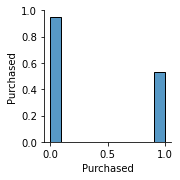

In [105]:
sns.pairplot(data, vars=['Purchased'])
plt.plot()

[]

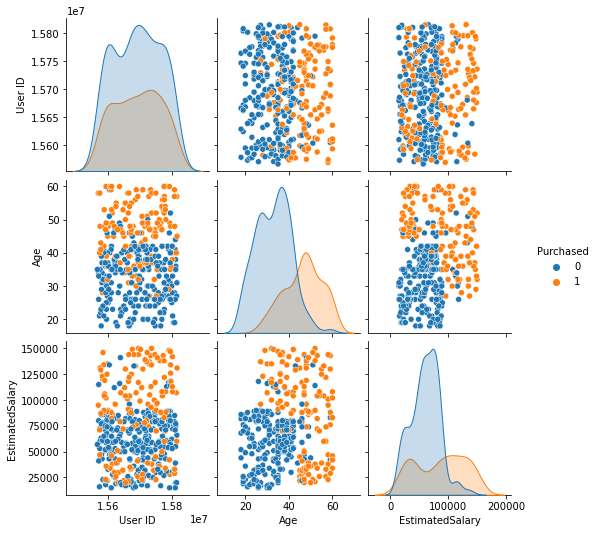

In [106]:
sns.pairplot(data,hue='Purchased')
plt.plot()

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
Gender= pd.get_dummies(data['Gender'],drop_first=True)

In [109]:
data = pd.concat([data,Gender],axis=1)

In [110]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [111]:
X = data[['Male','Age','EstimatedSalary']]
y = data['Purchased']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [115]:
predictions = logmodel.predict(X_test)

In [116]:
from sklearn.metrics import classification_report

## precision- (number of correctly predicted positive instances)/(number of total positive predictions made)
####                                                                 TP/(TP+FP)
## recall-  (number of correctly predicted positive instances)/(number of positive instances in the dataset)
####                                                                  TP/(TP+FN)
## support-  number of actual occurrences of the class in the specified dataset
## F1 score- harmonic mean of precision and recall
####                                                                2((PRECISION* RECALL)/(PRECISION+RECALL))

In [117]:
print(classification_report(y_test,predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100

